<a href="https://colab.research.google.com/github/alemolteni/codecarbon_project/blob/main/manage_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
runs = ["run1", "run2", "run3", "run4"]

In [8]:
#create list of dataframes. Emissions rate are saved as string since if saved as int they were badly approximated
streaming_3_df = []
classic_3_df = []
streaming_GPU_3_df = []
classic_GPU_3_df = []
streaming_4_df = []
classic_4_df = []
streaming_GPU_4_df = []
classic_GPU_4_df = []
for run in runs:
  streaming_3_df.append(pd.read_csv("/gdrive/My Drive/CodeCarbon/Codecarbon_emissions/" + run + "/3_Streaming.csv", dtype={'emissions_rate': str}))
  classic_3_df.append(pd.read_csv("/gdrive/My Drive/CodeCarbon/Codecarbon_emissions/" + run + "/3_Classic.csv", dtype={'emissions_rate': str}))
  streaming_GPU_3_df.append(pd.read_csv("/gdrive/My Drive/CodeCarbon/Codecarbon_emissions/" + run + "/3_Streaming_GPU.csv", dtype={'emissions_rate': str}))
  classic_GPU_3_df.append(pd.read_csv("/gdrive/My Drive/CodeCarbon/Codecarbon_emissions/" + run + "/3_Classic_GPU.csv", dtype={'emissions_rate': str}))
  streaming_4_df.append(pd.read_csv("/gdrive/My Drive/CodeCarbon/Codecarbon_emissions/" + run + "/4_Streaming.csv", dtype={'emissions_rate': str}))
  classic_4_df.append(pd.read_csv("/gdrive/My Drive/CodeCarbon/Codecarbon_emissions/" + run + "/4_Classic.csv", dtype={'emissions_rate': str}))
  streaming_GPU_4_df.append(pd.read_csv("/gdrive/My Drive/CodeCarbon/Codecarbon_emissions/" + run + "/4_Streaming_GPU.csv", dtype={'emissions_rate': str}))
  classic_GPU_4_df.append(pd.read_csv("/gdrive/My Drive/CodeCarbon/Codecarbon_emissions/" + run + "/4_Classic_GPU.csv", dtype={'emissions_rate': str}))

In [9]:
#filter relevant attributes
streaming_3_filtered = []
classic_3_filtered = []
streaming_GPU_3_filtered = []
classic_GPU_3_filtered = []
streaming_4_filtered = []
classic_4_filtered = []
streaming_GPU_4_filtered = []
classic_GPU_4_filtered = []
for position in range(0, len(streaming_3_df)):
  streaming_3_filtered.append(streaming_3_df[position][["duration", "emissions", "emissions_rate"]])
  classic_3_filtered.append(classic_3_df[position][["duration", "emissions", "emissions_rate"]])
  streaming_GPU_3_filtered.append(streaming_GPU_3_df[position][["duration", "emissions", "emissions_rate"]])
  classic_GPU_3_filtered.append(classic_GPU_3_df[position][["duration", "emissions", "emissions_rate"]])
  streaming_4_filtered.append(streaming_4_df[position][["duration", "emissions", "emissions_rate"]])
  classic_4_filtered.append(classic_4_df[position][["duration", "emissions", "emissions_rate"]])
  streaming_GPU_4_filtered.append(streaming_GPU_4_df[position][["duration", "emissions", "emissions_rate"]])
  classic_GPU_4_filtered.append(classic_GPU_4_df[position][["duration", "emissions", "emissions_rate"]])

In [10]:
#scale emissions from kg to mg
streaming_3_scaled = streaming_3_filtered
classic_3_scaled = classic_3_filtered
streaming_GPU_3_scaled = streaming_GPU_3_filtered
classic_GPU_3_scaled = classic_GPU_3_filtered
streaming_4_scaled = streaming_4_filtered
classic_4_scaled = classic_4_filtered
streaming_GPU_4_scaled = streaming_GPU_4_filtered
classic_GPU_4_scaled = classic_GPU_4_filtered
for position in range(0, len(streaming_3_scaled)):
  streaming_3_scaled[position]["emissions"] = streaming_3_filtered[position]["emissions"].apply(lambda x: x*1000000)
  classic_3_scaled[position]["emissions"] = classic_3_filtered[position]["emissions"].apply(lambda x: x*1000000)
  streaming_GPU_3_scaled[position]["emissions"] = streaming_GPU_3_filtered[position]["emissions"].apply(lambda x: x*1000000)
  classic_GPU_3_scaled[position]["emissions"] = classic_GPU_3_filtered[position]["emissions"].apply(lambda x: x*1000000)
  streaming_4_scaled[position]["emissions"] = streaming_4_filtered[position]["emissions"].apply(lambda x: x*1000000)
  classic_4_scaled[position]["emissions"] = classic_4_filtered[position]["emissions"].apply(lambda x: x*1000000)
  streaming_GPU_4_scaled[position]["emissions"] = streaming_GPU_4_filtered[position]["emissions"].apply(lambda x: x*1000000)
  classic_GPU_4_scaled[position]["emissions"] = classic_GPU_4_filtered[position]["emissions"].apply(lambda x: x*1000000)

<ipython-input-10-c80f52714f80>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streaming_3_scaled[position]["emissions"] = streaming_3_filtered[position]["emissions"].apply(lambda x: x*1000000)
<ipython-input-10-c80f52714f80>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classic_3_scaled[position]["emissions"] = classic_3_filtered[position]["emissions"].apply(lambda x: x*1000000)
<ipython-input-10-c80f52714f80>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [11]:
def convert_and_scale_emissions_rate(df):
  for index, row in df.iterrows():
    order = df.at[index, "emissions_rate"] = float((row["emissions_rate"])[-1])
    exponent = order - 6
    df.at[index, "emissions_rate"] = float((row["emissions_rate"])[:-4])
    df.at[index, "emissions_rate"] = df.at[index, "emissions_rate"]/10**exponent
  return df

In [12]:
#scale emissions rate to mg/s
for position in range(0, len(streaming_3_filtered)):
  streaming_3_filtered[position] = convert_and_scale_emissions_rate(streaming_3_filtered[position])
  classic_3_filtered[position] = convert_and_scale_emissions_rate(classic_3_filtered[position])
  streaming_GPU_3_filtered[position] = convert_and_scale_emissions_rate(streaming_GPU_3_filtered[position])
  classic_GPU_3_filtered[position] = convert_and_scale_emissions_rate(classic_GPU_3_filtered[position])
  streaming_4_filtered[position] = convert_and_scale_emissions_rate(streaming_4_filtered[position])
  classic_4_filtered[position] = convert_and_scale_emissions_rate(classic_4_filtered[position])
  streaming_GPU_4_filtered[position] = convert_and_scale_emissions_rate(streaming_GPU_4_filtered[position])
  classic_GPU_4_filtered[position] = convert_and_scale_emissions_rate(classic_GPU_4_filtered[position])

In [13]:
def compute_mean_values(df_list):
  df_mean = pd.DataFrame()
  duration_mean = []
  emissions_mean = []
  emissions_rate_mean = []

  for row in range(0, df_list[0].shape[0]):
    duration_sum_partial = 0
    emissions_sum_partial = 0
    emissions_rate_sum_partial = 0
    for position in range(0, len(df_list)):
      duration_sum_partial = duration_sum_partial + (df_list[position]).iloc[row]["duration"]
      emissions_sum_partial = emissions_sum_partial + (df_list[position]).iloc[row]["emissions"]
      emissions_rate_sum_partial = emissions_rate_sum_partial + (df_list[position]).iloc[row]["emissions_rate"]
    duration_mean.append(duration_sum_partial/3)
    emissions_mean.append(emissions_sum_partial/3)
    emissions_rate_mean.append(emissions_rate_sum_partial/3)

  df_mean["duration"] = duration_mean
  df_mean["emissions"] = emissions_mean
  df_mean["emissions_rate"] = emissions_rate_mean
  return df_mean

In [14]:
#compute the mean of all 4 datasets
streaming_3_mean = compute_mean_values(streaming_3_filtered)
classic_3_mean = compute_mean_values(classic_3_filtered)
streaming_GPU_3_mean = compute_mean_values(streaming_GPU_3_filtered)
classic_GPU_3_mean = compute_mean_values(classic_GPU_3_filtered)
streaming_4_mean = compute_mean_values(streaming_4_filtered)
classic_4_mean = compute_mean_values(classic_4_filtered)
streaming_GPU_4_mean = compute_mean_values(streaming_GPU_4_filtered)
classic_GPU_4_mean = compute_mean_values(classic_GPU_4_filtered)

In [15]:
with pd.ExcelWriter('Emissions_comparisons_notebook_3.xlsx') as writer:
    streaming_3_mean.to_excel(writer, sheet_name='streaming')
    classic_3_mean.to_excel(writer, sheet_name='classic')
    streaming_GPU_3_mean.to_excel(writer, sheet_name='streaming with GPU')
    classic_GPU_3_mean.to_excel(writer, sheet_name='classic with GPU')

In [16]:
with pd.ExcelWriter('Emissions_comparisons_notebook_4.xlsx') as writer:
    streaming_4_mean.to_excel(writer, sheet_name='streaming')
    classic_4_mean.to_excel(writer, sheet_name='classic')
    streaming_GPU_4_mean.to_excel(writer, sheet_name='streaming with GPU')
    classic_GPU_4_mean.to_excel(writer, sheet_name='classic with GPU')

In [17]:
#compute mean of all datasets for the emissions time series
streaming_emissions = []
streaming_GPU_emissions = []
classic_emissions = []
classic_GPU_emissions = []
for position in range (0, len(streaming_3_filtered)):
  streaming_emissions.append(pd.concat([streaming_3_filtered[position], streaming_4_filtered[position]]).mean()["emissions"])
  streaming_GPU_emissions.append(pd.concat([streaming_GPU_3_filtered[position], streaming_GPU_4_filtered[position]]).mean()["emissions"])
  classic_emissions.append(pd.concat([classic_3_filtered[position], classic_4_filtered[position]]).mean()["emissions"])
  classic_GPU_emissions.append(pd.concat([classic_GPU_3_filtered[position], classic_GPU_4_filtered[position]]).mean()["emissions"])

streaming_emissions = pd.DataFrame(streaming_emissions)
streaming_GPU_emissions = pd.DataFrame(streaming_GPU_emissions)
classic_emissions = pd.DataFrame(classic_emissions)
classic_GPU_emissions = pd.DataFrame(classic_GPU_emissions)

In [18]:
#compute mean of all datasets for the emissions rate time series
streaming_emissions_rate = []
streaming_GPU_emissions_rate = []
classic_emissions_rate = []
classic_GPU_emissions_rate = []
for position in range (0, len(streaming_3_filtered)):
  streaming_emissions_rate.append(pd.concat([streaming_3_filtered[position], streaming_4_filtered[position]]).mean()["emissions_rate"])
  streaming_GPU_emissions_rate.append(pd.concat([streaming_GPU_3_filtered[position], streaming_GPU_4_filtered[position]]).mean()["emissions_rate"])
  classic_emissions_rate.append(pd.concat([classic_3_filtered[position], classic_4_filtered[position]]).mean()["emissions_rate"])
  classic_GPU_emissions_rate.append(pd.concat([classic_GPU_3_filtered[position], classic_GPU_4_filtered[position]]).mean()["emissions_rate"])

streaming_emissions_rate = pd.DataFrame(streaming_emissions_rate)
streaming_GPU_emissions_rate = pd.DataFrame(streaming_GPU_emissions_rate)
classic_emissions_rate = pd.DataFrame(classic_emissions_rate)
classic_GPU_emissions_rate = pd.DataFrame(classic_GPU_emissions_rate)

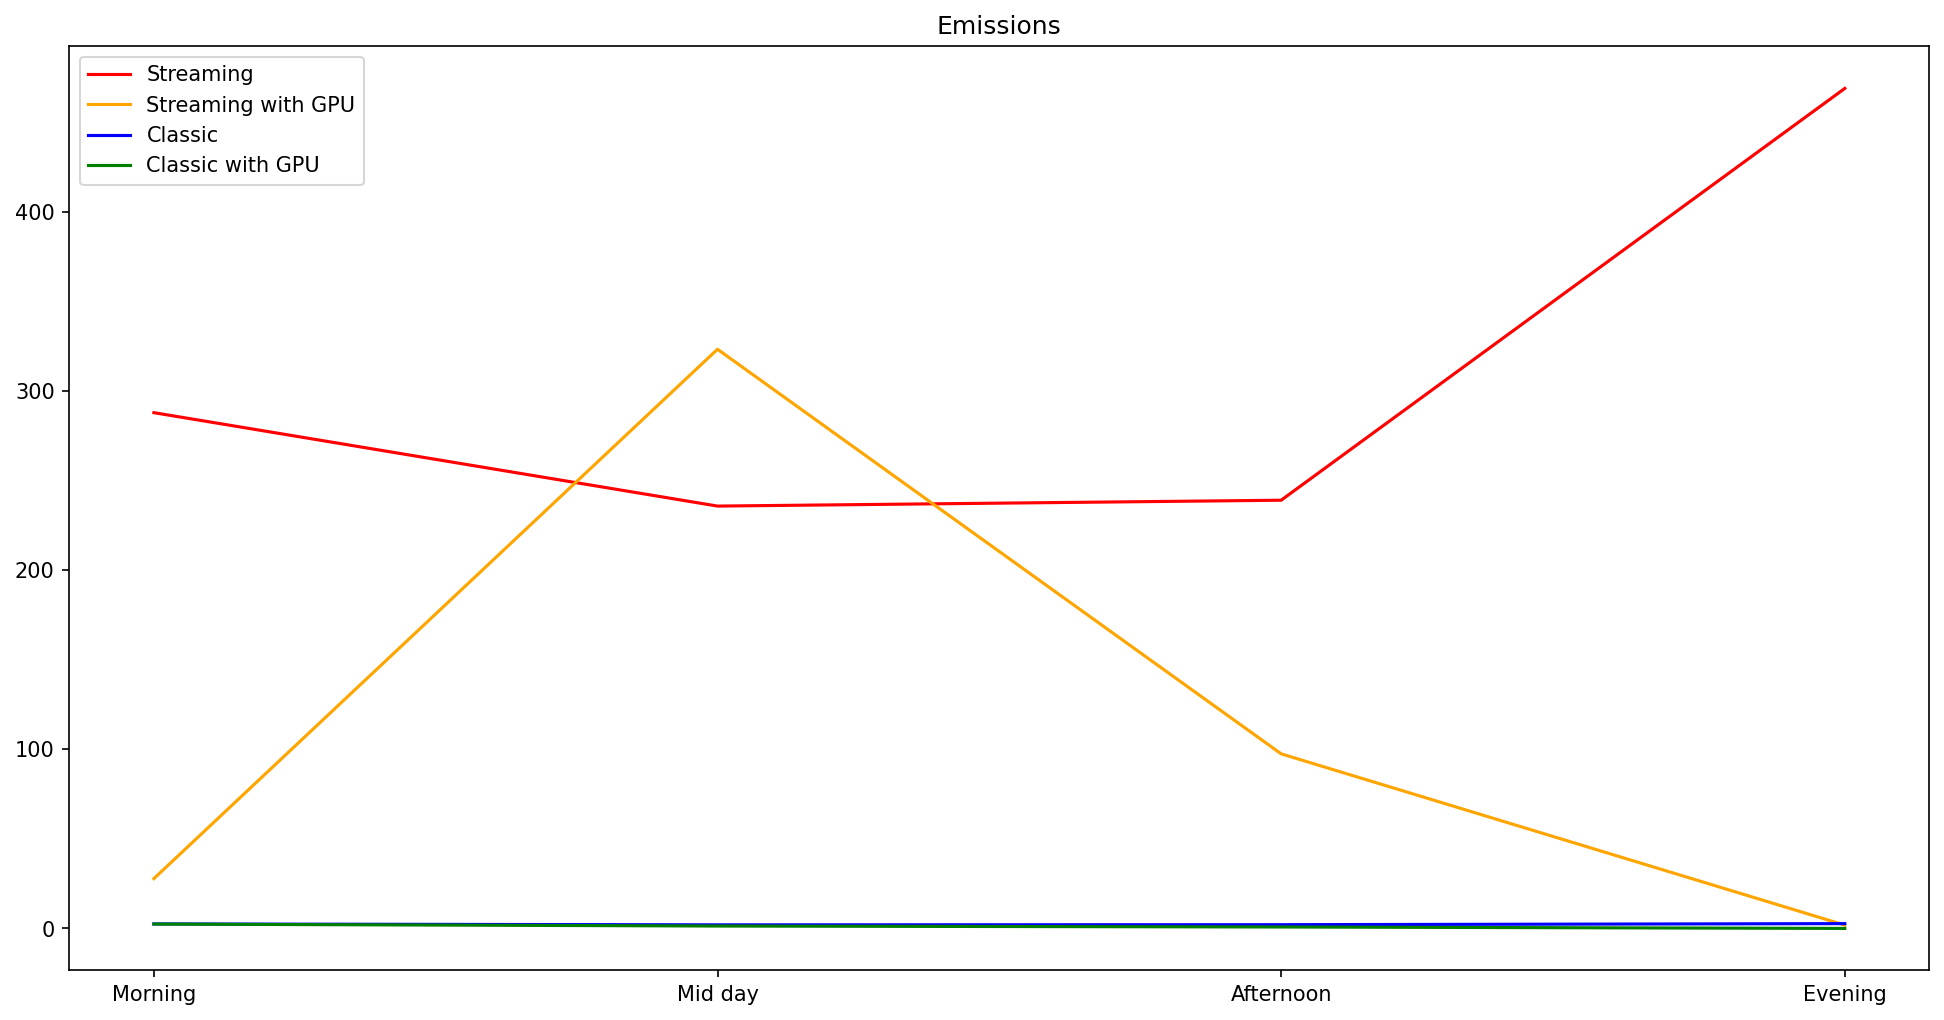

In [19]:
#plot emissions time series
plt.figure(figsize=(16, 8), dpi=150)

streaming_emissions[0].plot(label='Streaming', color='red')
streaming_GPU_emissions[0].plot(label='Streaming with GPU', color='orange')
classic_emissions[0].plot(label='Classic', color='blue')
classic_GPU_emissions[0].plot(label='Classic with GPU', color='green')

plt.title('Emissions')


my_xticks = ['Morning','Mid day','Afternoon','Evening']
plt.xticks(list(range(len(streaming_emissions[0]))), my_xticks)

plt.legend()

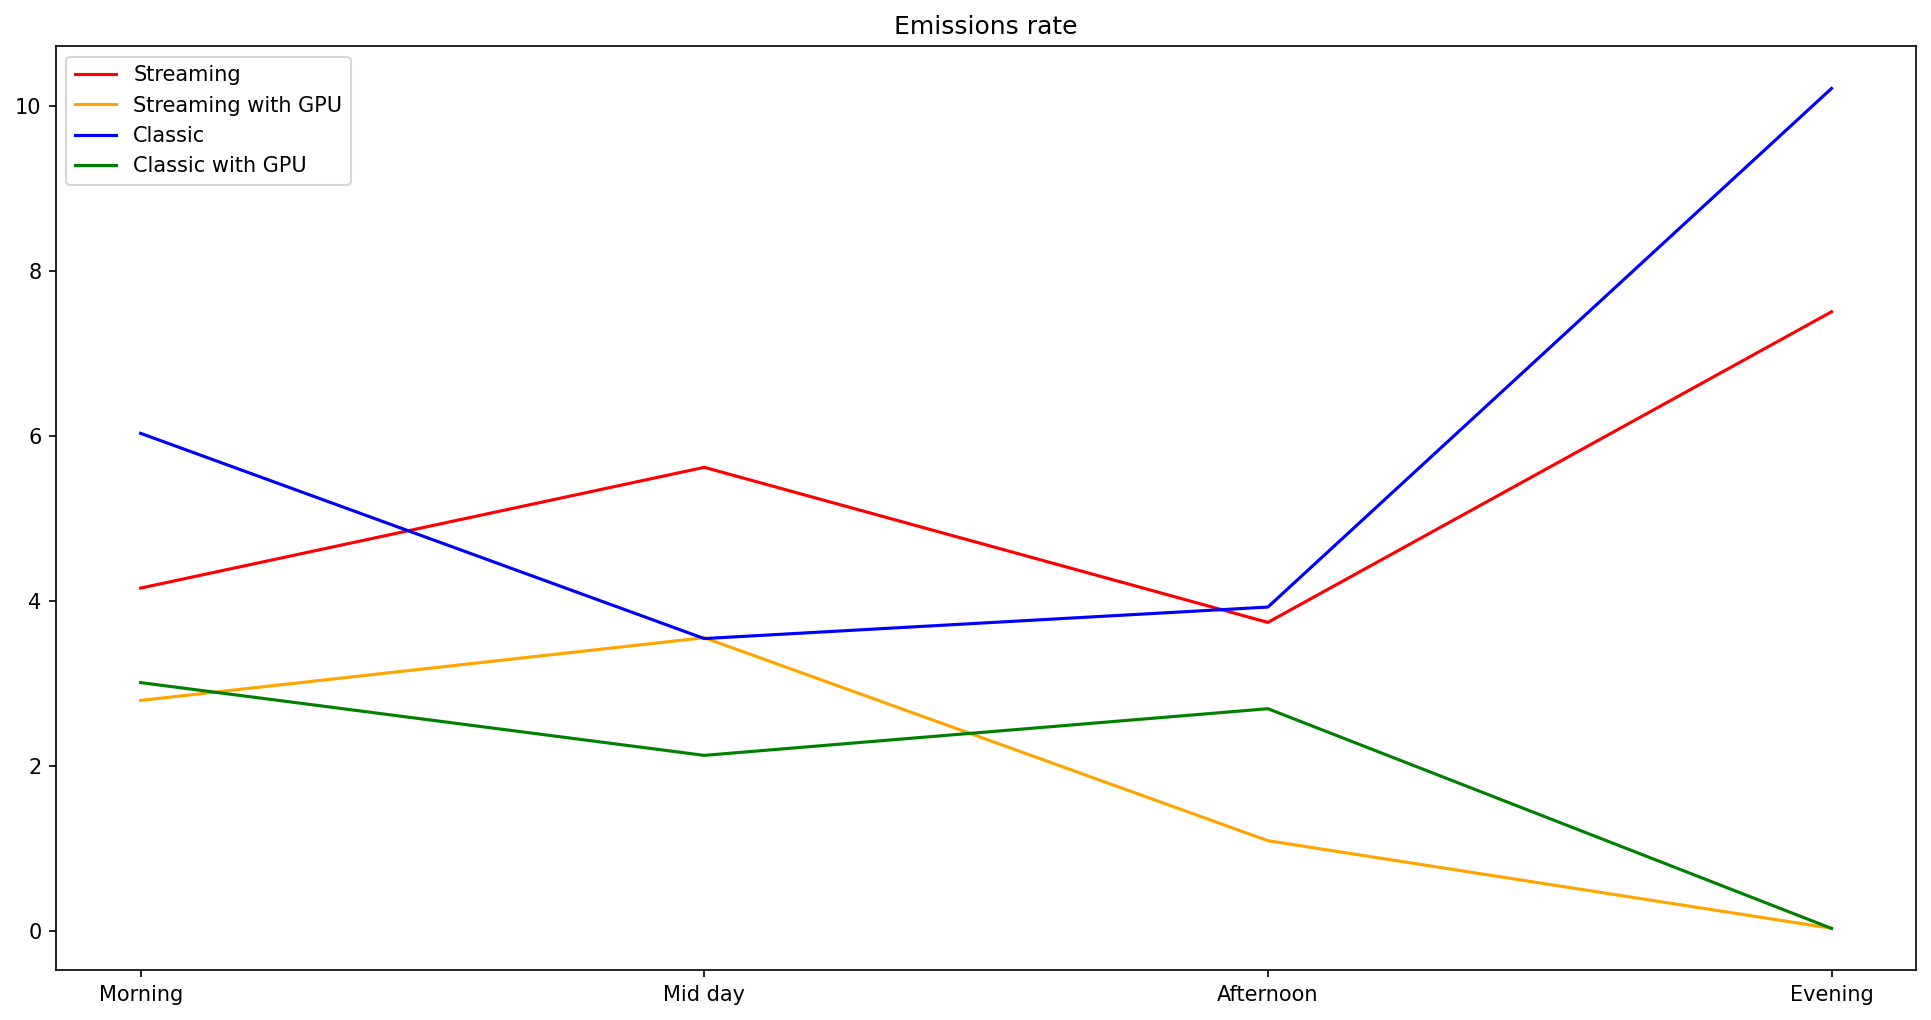

In [20]:
#plot emissions rate time series
plt.figure(figsize=(16, 8), dpi=150)

streaming_emissions_rate[0].plot(label='Streaming', color='red')
streaming_GPU_emissions_rate[0].plot(label='Streaming with GPU', color='orange')
classic_emissions_rate[0].plot(label='Classic', color='blue')
classic_GPU_emissions_rate[0].plot(label='Classic with GPU', color='green')

plt.title('Emissions rate')


my_xticks = ['Morning','Mid day','Afternoon','Evening']
plt.xticks(list(range(len(streaming_emissions[0]))), my_xticks)

plt.legend()